In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
import matplotlib.colors as mcolors
from collections import OrderedDict

# for Notebook
%matplotlib inline

## Dataset description


- The dataset represents a duet-network, collected from Spotify
- The edges are tracks performed together by the two artist nodes 
- For each track:
        - number of artists = 2
        - popularity > 20 
        - year in (1960, 2018)
        - genre in ('pop', 'soul', 'romance', 'rock', 'hip-hop', 'country', 
                    'reggae', 'rap', 'disco', 'dance', 'blues')
- Each artist performed at least 10 duets



In [2]:
df = pd.read_csv("./duets_final.csv")
df

source                      target    Genre  \
0     Dinah Washington                Quincy Jones     soul   
1     Dinah Washington                Quincy Jones     soul   
2      Louis Armstrong              Duke Ellington     soul   
3      Louis Armstrong              Duke Ellington     soul   
4      Louis Armstrong              Duke Ellington     soul   
...                ...                         ...      ...   
5369         21 Savage                Metro Boomin  hip-hop   
5370         21 Savage                Metro Boomin  hip-hop   
5371         21 Savage                Metro Boomin  hip-hop   
5372         21 Savage  YoungBoy Never Broke Again      rap   
5373       Kodak Black                XXXTENTACION  hip-hop   

                                                  Track  Year  Popularity  
0                                        Stormy Weather  1990          32  
1                             Ev'ry Time We Say Goodbye  1991          28  
2     It Don't Mean a Thing (If It Ain't Got That Sw...  1963          52  
3                                                Azalea  1963          47  
4                                              Solitude  1963          36  
...                                                 ...   ...         ...  
5369                                            Bad Guy  2016          49  
5370                              My Choppa Hate Niggas  2017          65  
5371                                   Run Up the Racks  2017          57  
5372                   Murder (feat. 21 Savage) [Remix]  2016          49  
5373                 Roll in Peace (feat. XXXTENTACION)  2017          78  

[5374 rows x 6 columns]

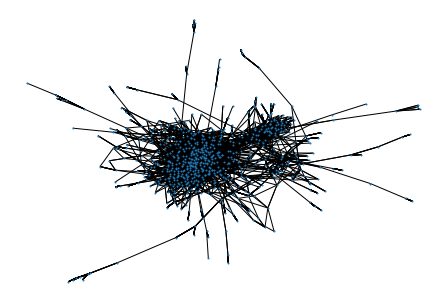

In [3]:
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=["Track","Genre", "Year", "Popularity" ],
                            create_using=nx.MultiGraph())
nx.draw_spring(G, node_size=1, with_labels=False)

In [384]:
degrees = [G.degree[node]for node in G]
N = len(G)
L = G.size()

kmin = np.min(degrees)
kmax = np.max(degrees)
kavg = np.mean(degrees)

diameter = nx.diameter(G)
avg_shortest_path = nx.average_shortest_path_length(G)
density = nx.density(G)

print('Multigraph:')
print('N = ', N)
print('L = ', L)

print('k min = ' + str(kmin))
print('k max = ' + str(kmax))
print('k avg = ' + str(kavg))

print('diameter = ' + str(diameter))
print('avg skortest path = ' + str(avg_shortest_path))
print('density = ' + str(density) + '\n')


Multigraph:
N =  687
L =  5374
k min = 1
k max = 149
k avg = 15.644832605531295
diameter = 15
avg skortest path = 4.358477514524212
density = 0.02280587843371909

7.125818339732615


In [118]:
# description for the weighted version of the multigraph (ignoring multiple edges)
G_weighted = nx.Graph()

for u,v in G.edges():
    if G_weighted.has_edge(u,v):
        G_weighted[u][v]['weight'] += 1
    else:
        G_weighted.add_edge(u, v, weight=1)

G_weighted_secret_copy = G_weighted.copy()

degrees_w = [G_weighted.degree[node]for node in G_weighted]

N_w = len(G_weighted)
L_w = G_weighted.size()

kmin_w = np.min(degrees_w)
kmax_w = np.max(degrees_w)
kavg_w = np.mean(degrees_w)

density_w = nx.density(G_weighted)
        
avg_cc = nx.average_clustering(G_weighted)
cc=nx.clustering(G_weighted)
sort_cc = OrderedDict(sorted(cc.items(), key=lambda x: x[1]))

print('Weighted graph:')

print('N = ', N_w)
print('L = ', L_w)

print('k min = ' + str(kmin_w))
print('k max = ' + str(kmax_w))
print('k avg = ' + str(kavg_w))

print('density = ' + str(density_w))

Weighted graph:
N =  687
L =  2623
k min = 1
k max = 63
k avg = 7.636098981077147
density = 0.011131339622561439


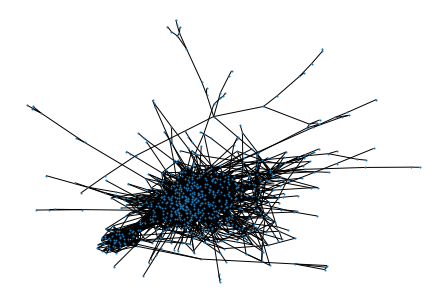

In [351]:
nx.draw_spring(G_weighted, node_size=1, with_labels=False)

In [119]:
print('avg clustering coefficent = ' + str(avg_cc))
print ( 'Number of nodes where CC=1.00 -', sum(value == 1.0 for value in sort_cc.values()))
print ( 'Number of nodes where CC=0.00 -', sum(value == 0.0 for value in sort_cc.values()))

avg clustering coefficent = 0.11471940064475389
Number of nodes where CC=1.00 - 8
Number of nodes where CC=0.00 - 278


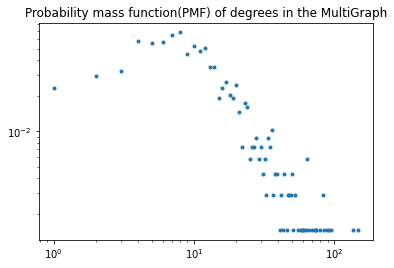

In [194]:
def getDegreeDistribution(G):
    degree_sequence = sorted([d for n,d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg,cnt=zip(*degreeCount.items())
    pmf=[c/N for c in cnt]
    return deg,pmf

options=dict(ls='',marker='.')

deg_G, pmf_G = getDegreeDistribution(G)
plt.loglog(deg_G, pmf_G, **options)
plt.title('Probability mass function(PMF) of degrees in the MultiGraph')
plt.show()

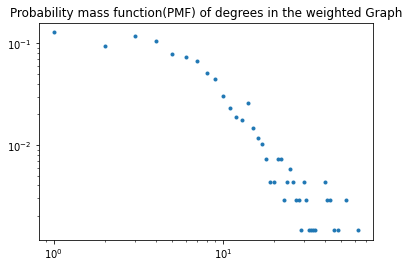

In [193]:
deg_G_w, pmf_G_w = getDegreeDistribution(G_weighted)
plt.loglog(deg_G_w, pmf_G_w, **options)
plt.title('Probability mass function(PMF) of degrees in the weighted Graph')
plt.show()


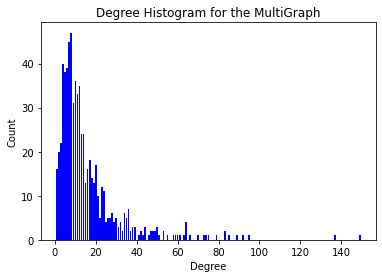

In [6]:
degree_sequence=sorted([d for n, d in G.degree()], reverse=True)
degreeCount=collections.Counter(degree_sequence)
deg, cnt=zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram for the MultiGraph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

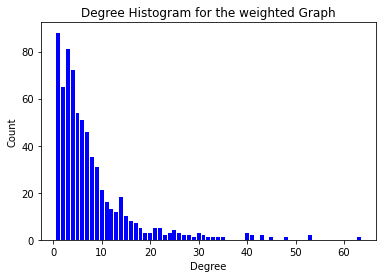

In [7]:
degree_sequence=sorted([d for n, d in G_weighted.degree()], reverse=True)
degreeCount=collections.Counter(degree_sequence)
deg, cnt=zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram for the weighted Graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

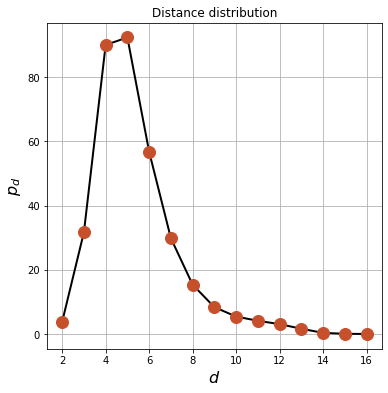

In [8]:
G_int = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)

D=np.zeros(shape=(N,N))
# D is the matrix of distances
vl=[]
for node1 in G_int.nodes():
    for node2 in G_int.nodes():
        if node1 != node2 and D[node1][node2] == 0:
            aux=nx.shortest_path(G_int, node1, node2)
            dij=len(aux)
            D[node1][node2]=dij
            D[node2][node1]=dij
            vl.append(dij)
            
d={}
for elem in vl:
    if elem in d:
        d[elem] += 1
    else:
        d[elem] = 1
        
distances=sorted(d.keys())
pdistances=[d[i]/N for i in distances]
distances

plt.figure(figsize=(6,6))
plt.plot(distances, pdistances, linestyle="solid", linewidth=2, color="black")
plt.plot(distances, pdistances,"o", color='#c7502c', markersize=12)
#plt.axvline(x=avg_dist, color="black", linestyle="dashed")
plt.xlabel(r"$d$", fontsize=16)
plt.ylabel(r"$p_d$", fontsize=16)
plt.title("Distance distribution")
plt.grid(True)
plt.show()

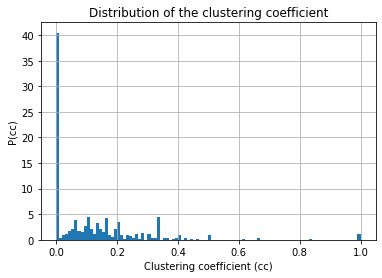

In [9]:
plt.hist(cc.values(), bins=100, density=True)
plt.grid(True)
plt.title("Distribution of the clustering coefficient")
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")
plt.show()

# Centrality measures

## Degree centrality

In [10]:
# Node degrees considering multiple edges
dw = sorted(G.degree, key=lambda x: x[1], reverse=True)
dw

[('Lil Wayne', 149),
 ('JAY-Z', 137),
 ('Snoop Dogg', 95),
 ('Drake', 92),
 ('Jerry Garcia', 89),
 ('Maze', 85),
 ('Eric Clapton', 83),
 ('Frankie Beverly', 83),
 ('Kanye West', 79),
 ('Willie Nelson', 75),
 ('Johnny Cash', 74),
 ('Ella Fitzgerald', 73),
 ('Rick Ross', 70),
 ('Daddy Yankee', 66),
 ('Ludacris', 64),
 ('Pitbull', 64),
 ('Future', 64),
 ('T.I.', 64),
 ('Nicki Minaj', 63),
 ('Wiz Khalifa', 61),
 ('Chris Brown', 60),
 ('Akon', 59),
 ('Mary J. Blige', 58),
 ('Don Omar', 55),
 ('Louis Armstrong', 53),
 ('Neil Young', 53),
 ('Eminem', 51),
 ('2Pac', 50),
 ('Crazy Horse', 50),
 ('Nicky Jam', 50),
 ('T-Pain', 49),
 ('Jeezy', 49),
 ('Jerry Garcia Band', 48),
 ('David Grisman', 48),
 ('Pharrell Williams', 47),
 ('Nas', 47),
 ('Chaka Khan', 46),
 ('Marvin Gaye', 44),
 ('Method Man', 44),
 ('Toumani Diabaté', 44),
 ('50 Cent', 43),
 ('Kendrick Lamar', 42),
 ('Missy Elliott', 42),
 ('Beyoncé', 41),
 ('Van Morrison', 39),
 ('Big Sean', 39),
 ('Rihanna', 39),
 ('June Carter Cash', 38),

In [11]:
# Node degrees ignoring multiple edges

d = sorted(G_weighted.degree, key=lambda x: x[1], reverse=True)
d

[('Lil Wayne', 63),
 ('Snoop Dogg', 53),
 ('JAY-Z', 53),
 ('Ludacris', 48),
 ('T.I.', 45),
 ('Mary J. Blige', 43),
 ('Kanye West', 43),
 ('Rick Ross', 41),
 ('Chris Brown', 41),
 ('Akon', 40),
 ('Drake', 40),
 ('Nicki Minaj', 40),
 ('Pitbull', 35),
 ('Nas', 34),
 ('Jeezy', 33),
 ('Future', 32),
 ('Big Sean', 31),
 ('Daddy Yankee', 31),
 ('T-Pain', 30),
 ('Pharrell Williams', 30),
 ('Gucci Mane', 30),
 ('Kendrick Lamar', 29),
 ('Busta Rhymes', 28),
 ('The Game', 28),
 ('50 Cent', 27),
 ('Fabolous', 27),
 ('Wiz Khalifa', 26),
 ('Nicky Jam', 26),
 ('Don Omar', 26),
 ('Eminem', 25),
 ('Usher', 25),
 ('Beyoncé', 25),
 ('Missy Elliott', 25),
 ('Ty Dolla $ign', 24),
 ('Mariah Carey', 24),
 ('Rihanna', 24),
 ('Diddy', 23),
 ('Common', 23),
 ('John Legend', 22),
 ('Ne-Yo', 22),
 ('Wisin & Yandel', 22),
 ('2 Chainz', 22),
 ('Farruko', 22),
 ('Willie Nelson', 21),
 ('Jadakiss', 21),
 ('Trey Songz', 21),
 ('Twista', 21),
 ('Yandel', 21),
 ('Meek Mill', 20),
 ('Nelly', 20),
 ('Wisin', 20),
 ('will.

In [12]:
degree_centrality = nx.degree_centrality(G)

d_sorted_by_value =sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
d_sorted_by_value

[('Lil Wayne', 0.21720116618075802),
 ('JAY-Z', 0.19970845481049562),
 ('Snoop Dogg', 0.13848396501457727),
 ('Drake', 0.13411078717201166),
 ('Jerry Garcia', 0.12973760932944606),
 ('Maze', 0.1239067055393586),
 ('Eric Clapton', 0.12099125364431487),
 ('Frankie Beverly', 0.12099125364431487),
 ('Kanye West', 0.1151603498542274),
 ('Willie Nelson', 0.10932944606413994),
 ('Johnny Cash', 0.10787172011661808),
 ('Ella Fitzgerald', 0.10641399416909621),
 ('Rick Ross', 0.10204081632653061),
 ('Daddy Yankee', 0.09620991253644315),
 ('Ludacris', 0.09329446064139942),
 ('Pitbull', 0.09329446064139942),
 ('Future', 0.09329446064139942),
 ('T.I.', 0.09329446064139942),
 ('Nicki Minaj', 0.09183673469387756),
 ('Wiz Khalifa', 0.08892128279883382),
 ('Chris Brown', 0.08746355685131195),
 ('Akon', 0.08600583090379009),
 ('Mary J. Blige', 0.08454810495626822),
 ('Don Omar', 0.08017492711370262),
 ('Louis Armstrong', 0.07725947521865889),
 ('Neil Young', 0.07725947521865889),
 ('Eminem', 0.0743440233

Text(0, 0.5, 'Degree Centrality')

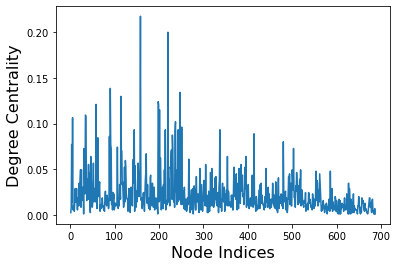

In [357]:
# Degree Centrality values by nodes

dce = nx.degree_centrality(G)
dce = np.asarray(list(dce.values()))

num_nodes = len(G.nodes())
nodes_axis = range(1, num_nodes + 1)

plt.plot(nodes_axis, dce)
plt.xlabel('Node Indices', fontsize=16)
plt.ylabel('Degree Centrality', fontsize=16)

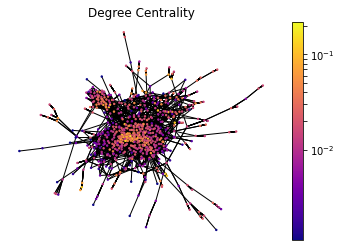

In [13]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=2, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()
    
pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

## Closeness centrality

In [14]:
closeness_centrality = nx.closeness_centrality(G)
#print(closeness_centrality)
closeness_sorted_by_value =sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
closeness_sorted_by_value

[('Snoop Dogg', 0.3462897526501767),
 ('Akon', 0.34489693313222725),
 ('Lil Wayne', 0.34231536926147704),
 ('Mary J. Blige', 0.33859822309970383),
 ('JAY-Z', 0.33676975945017185),
 ('Ludacris', 0.33284813197476953),
 ('T.I.', 0.33012512030798846),
 ('Rick Ross', 0.3288590604026846),
 ('Fabolous', 0.3277591973244147),
 ('Chris Brown', 0.32713400095374345),
 ('T-Pain', 0.32527264106211473),
 ('Jeezy', 0.32419659735349715),
 ('Kanye West', 0.3223684210526316),
 ('The Game', 0.3220657276995305),
 ('Pitbull', 0.32131147540983607),
 ('Nas', 0.3201119925338311),
 ('Eminem', 0.3187732342007435),
 ('50 Cent', 0.31862517417556896),
 ('Usher', 0.3183294663573086),
 ('Drake', 0.3178869323447637),
 ('Pharrell Williams', 0.31744562702452567),
 ('Nicki Minaj', 0.31627478100507145),
 ('John Legend', 0.31598341777982497),
 ('Mariah Carey', 0.3148233134465351),
 ('Wiz Khalifa', 0.3142464498396702),
 ('Future', 0.3138151875571821),
 ('Enrique Iglesias', 0.31267092069279856),
 ('Robin Thicke', 0.311534968

Text(0, 0.5, 'Closeness Centrality')

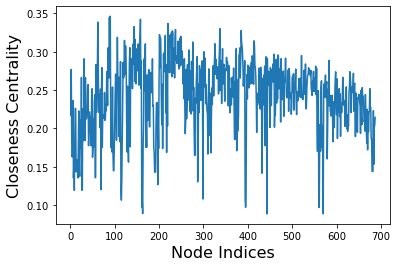

In [356]:
# Closeness Centrality values by nodes

cce = nx.closeness_centrality(G)
cce = np.asarray(list(cce.values()))

num_nodes = len(G.nodes())
nodes_axis = range(1, num_nodes + 1)

plt.plot(nodes_axis, cce)
plt.xlabel('Node Indices', fontsize=16)
plt.ylabel('Closeness Centrality', fontsize=16)

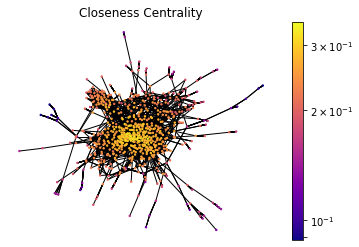

In [16]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

## Betweenness Centrality

In [17]:
betweenneess = nx.betweenness_centrality(G_weighted)
betw_sorted_by_value = sorted(betweenneess.items(), key=lambda x: x[1], reverse=True)
betw_sorted_by_value

[('Willie Nelson', 0.09469718572917157),
 ('Snoop Dogg', 0.09413276918476034),
 ('Akon', 0.08903206663568375),
 ('Mary J. Blige', 0.07552724694632192),
 ('Ray Charles', 0.06717441090954522),
 ('Lil Wayne', 0.06696331540802603),
 ('Milt Jackson', 0.06454902126758671),
 ('Eric Clapton', 0.052401607181198434),
 ('Daddy Yankee', 0.044285832879666975),
 ('Pitbull', 0.04121404428375735),
 ('Lionel Richie', 0.03783133821397697),
 ('JAY-Z', 0.037099712730646),
 ('Nas', 0.03669771662447916),
 ('Ludacris', 0.03549528132310875),
 ('Dolly Parton', 0.03532579900243114),
 ('Whitney Houston', 0.030083750631295005),
 ('Wes Montgomery', 0.02880977208401609),
 ('T.I.', 0.028683636098662178),
 ('Kid Rock', 0.027778573320991307),
 ('Mariah Carey', 0.027576250052584107),
 ('Wisin & Yandel', 0.025538435509471692),
 ('Miley Cyrus', 0.0251058525262606),
 ('Chris Brown', 0.023863628248046102),
 ('Jimmy Smith', 0.023085271647762338),
 ('Barry Manilow', 0.022432220058582406),
 ('Brad Paisley', 0.0224260546837535

Text(0, 0.5, 'Betweenness Centrality')

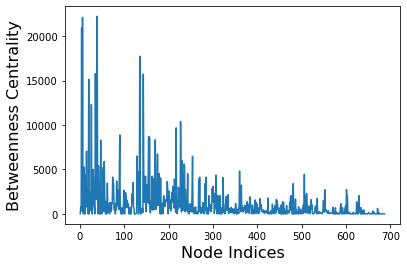

In [18]:
# Betweenness Centrality values by nodes

bc = nx.betweenness_centrality(G_weighted, normalized=False)
bc = np.asarray(list(bc.values()))

num_nodes = len(G_weighted.nodes())
nodes_axis = range(1, num_nodes + 1)


plt.plot(nodes_axis, bc)
plt.xlabel('Node Indices', fontsize=16)
plt.ylabel('Betweenness Centrality', fontsize=16)

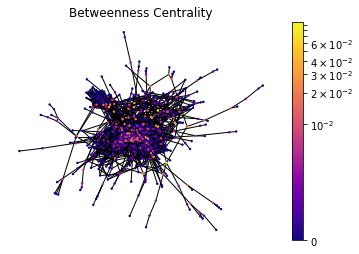

In [19]:
draw(G_weighted, pos, nx.betweenness_centrality(G_weighted), 'Betweenness Centrality')

## Eigenvector Centrality

In [20]:
eigenvector_centrality = nx.eigenvector_centrality(G_weighted)
ec_sorted_by_value = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
ec_sorted_by_value

[('Lil Wayne', 0.230495130729512),
 ('Kanye West', 0.2001783922981259),
 ('JAY-Z', 0.19757693594415388),
 ('Rick Ross', 0.19147363047981844),
 ('Ludacris', 0.18865767913466672),
 ('Drake', 0.18745927846701899),
 ('Chris Brown', 0.1873398910633259),
 ('Nicki Minaj', 0.1759550565032924),
 ('T.I.', 0.17234193809535914),
 ('Mary J. Blige', 0.1707666452104956),
 ('Jeezy', 0.16544979425604348),
 ('Future', 0.14917385076258613),
 ('Snoop Dogg', 0.13437565566483947),
 ('Gucci Mane', 0.1331330362878448),
 ('The Game', 0.12771488298700145),
 ('T-Pain', 0.12266995296457076),
 ('Usher', 0.1224658396438765),
 ('Fabolous', 0.11997836542483169),
 ('Big Sean', 0.11300812476623151),
 ('Pharrell Williams', 0.11300544519850345),
 ('Trey Songz', 0.11250144252004236),
 ('Kendrick Lamar', 0.11042125459536632),
 ('Rihanna', 0.1088019398323021),
 ('2 Chainz', 0.10443406414757184),
 ('Nas', 0.10440152671924108),
 ('Wiz Khalifa', 0.10423426407830098),
 ('Jamie Foxx', 0.10419520805343448),
 ('Akon', 0.0996572601

Text(0, 0.5, 'Eigenvector Centrality')

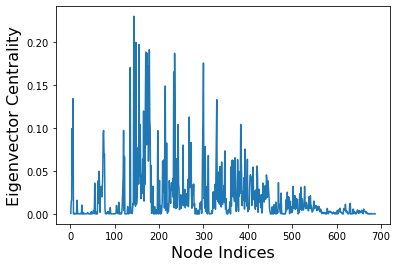

In [21]:
# Eigenvector Centrality values by nodes

ec = nx.eigenvector_centrality(G_weighted)
ec = np.asarray(list(ec.values()))

num_nodes = len(G_weighted.nodes())
nodes_axis = range(1, num_nodes + 1)


plt.plot(nodes_axis, ec)
plt.xlabel('Node Indices', fontsize=16)
plt.ylabel('Eigenvector Centrality', fontsize=16)

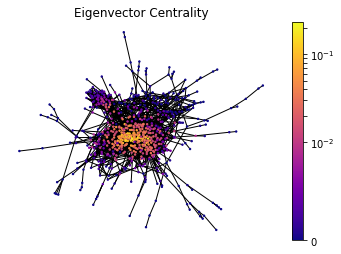

In [22]:
draw(G_weighted, pos, nx.eigenvector_centrality(G_weighted), 'Eigenvector Centrality')

### This part was implemented by Karola.



# Questions


## Who are the biggest duet artists? 

According to the above calculated measures each top 10 artists are ranked,
and sorted by their mean score

In [23]:
dict_artists = {}

for i in range(10):
    
    value = 10-i
    artists = []
    
    # degree (weighted) = number of duet performance
    artists.append(dw[i][0])
    
    # degree (unweighted) = number of duet partners
    artists.append(d[i][0])
    
    # closeness centrality
    artists.append(closeness_sorted_by_value[i][0])
        
    # betweenness centrality
    artists.append(betw_sorted_by_value[i][0])

    # eigenvector centrality
    artists.append(ec_sorted_by_value[i][0])
    
    for j in range(len(artists)):
        if artists[j] in dict_artists.keys():
            dict_artists[artists[j]] += value
        else:
             dict_artists[artists[j]] = value
                
for key in dict_artists.keys():
    dict_artists[key] = dict_artists[key] / len(artists)
    
dict_artists = sorted(dict_artists.items(), key=lambda item: item[1], reverse=True)

dict_artists


[('Lil Wayne', 8.6),
 ('Snoop Dogg', 7.2),
 ('JAY-Z', 6.2),
 ('Mary J. Blige', 4.0),
 ('Akon', 3.6),
 ('Ludacris', 3.6),
 ('Kanye West', 3.0),
 ('Rick Ross', 2.6),
 ('Drake', 2.4),
 ('T.I.', 2.4),
 ('Willie Nelson', 2.2),
 ('Eric Clapton', 1.4),
 ('Chris Brown', 1.4),
 ('Jerry Garcia', 1.2),
 ('Ray Charles', 1.2),
 ('Maze', 1.0),
 ('Milt Jackson', 0.8),
 ('Frankie Beverly', 0.6),
 ('Nicki Minaj', 0.6),
 ('Fabolous', 0.4),
 ('Daddy Yankee', 0.4),
 ('Pitbull', 0.2)]

In [213]:
# duet-idols (sorted by the number of common productions)
edges_weights_sorted = sorted(G_weighted.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
edges_weights_sorted

[('Maze', 'Frankie Beverly', {'weight': 83}),
 ('Neil Young', 'Crazy Horse', {'weight': 50}),
 ('Jerry Garcia', 'Jerry Garcia Band', {'weight': 48}),
 ('Louis Armstrong', 'Ella Fitzgerald', {'weight': 42}),
 ('Jerry Garcia', 'David Grisman', {'weight': 41}),
 ('Johnny Cash', 'June Carter Cash', {'weight': 38}),
 ('Rufus', 'Chaka Khan', {'weight': 32}),
 ('MF DOOM', 'MF Grimm', {'weight': 31}),
 ('Marvin Gaye', 'Tammi Terrell', {'weight': 28}),
 ('Patsy Cline', 'The Jordanaires', {'weight': 27}),
 ('Webbie', 'Boosie Badazz', {'weight': 27}),
 ('Lil Wayne', 'Birdman', {'weight': 25}),
 ('Ken-Y', 'R.K.M & Ken-Y', {'weight': 25}),
 ('Dave Matthews', 'Tim Reynolds', {'weight': 24}),
 ('Method Man', 'Redman', {'weight': 24}),
 ('Ali Farka Touré', 'Toumani Diabaté', {'weight': 24}),
 ('Van Morrison', 'Them', {'weight': 23}),
 ('Eric Clapton', 'John Mayall & The Bluesbreakers', {'weight': 23}),
 ('2Pac', 'Outlawz', {'weight': 23}),
 ('Beth Hart', 'Joe Bonamassa', {'weight': 23}),
 ('Harold Mel

In [ ]:
#  Frankie Beverly & Maze - American soul band
# Neil Young & Crazy Horse - American rock band

# 'Louis Armstrong', 'Ella Fitzgerald'
# 'Johnny Cash', 'June Carter Cash',
# 'Marvin Gaye', 'Tammi Terrell'

number of edges with weight 1 =  1840
number of edges with weight 2 =  457


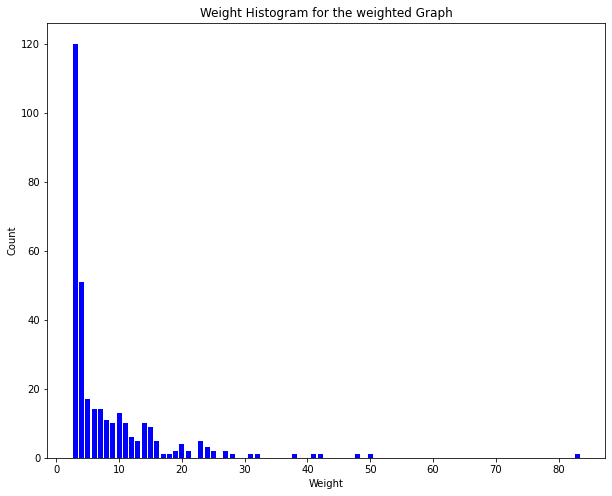

In [228]:
weight_sequence = [x[2]['weight'] for x in edges_weights_sorted]
print('number of edges with weight 1 = ', weight_sequence.count(1))
print('number of edges with weight 2 = ', weight_sequence.count(2))
weight_sequence = [x for x in weight_sequence if x != 1 and  x != 2]
weightCount=collections.Counter(weight_sequence)
w, cnt=zip(*weightCount.items())
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(w, cnt, width=0.80, color="b")
plt.title("Weight Histogram for the weighted Graph")
plt.ylabel("Count")
plt.xlabel("Weight")
plt.show()

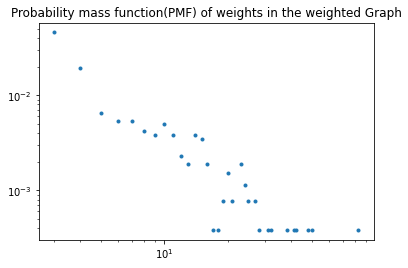

In [313]:

deg,cnt=zip(*weightCount.items())
pmf=[c/L_w for c in cnt]

options=dict(ls='',marker='.')

plt.loglog(deg, pmf, **options)
plt.title('Probability mass function(PMF) of weights in the weighted Graph')
plt.show()

In [210]:
# duet-artist triangles in the network (sorted by the sum of the common productions between the pairs)

triangles = [c for c in nx.cycle_basis(G_weighted) if len(c)==3]
print('Number of duet-triangles = ',len(triangles))

triangle_with_weight = []
for triangle in triangles:
    a1 = triangle[0]
    a2 = triangle[1]
    a3 = triangle[2]
    sum_weight = 0
    sum_weight += G_weighted.get_edge_data(a1,a2)['weight']
    sum_weight += G_weighted.get_edge_data(a1,a3)['weight']
    sum_weight += G_weighted.get_edge_data(a2,a3)['weight']
    triangle.append(sum_weight)
    triangle_with_weight.append(triangle)
    
triangle_with_weight =  sorted(triangle_with_weight, key=lambda x: x[3], reverse=True)
triangle_with_weight


Number of duet-triangles =  428


[['Willie Nelson', 'Johnny Cash', 'Waylon Jennings', 44],
 ['Willie Nelson', 'Merle Haggard', 'Johnny Cash', 32],
 ['Beyoncé', 'Kanye West', 'JAY-Z', 30],
 ['Ali Farka Touré', 'Toumani Diabaté', 'Taj Mahal', 28],
 ['R.K.M & Ken-Y', 'Ken-Y', 'Nicky Jam', 28],
 ['Redman', 'Dru Hill', 'Method Man', 27],
 ['Jeezy', 'Kanye West', 'JAY-Z', 25],
 ['Rick Ross', 'Kanye West', 'JAY-Z', 25],
 ['Stephen Marley', 'Ziggy Marley', 'Bob Marley & The Wailers', 24],
 ['Rihanna', 'Kanye West', 'JAY-Z', 23],
 ['Lil Wayne', 'Kanye West', 'JAY-Z', 23],
 ['Mary J. Blige', 'Kanye West', 'JAY-Z', 22],
 ['Kid Cudi', 'Kanye West', 'JAY-Z', 22],
 ['Pharrell Williams', 'Kanye West', 'JAY-Z', 22],
 ['Pusha T', 'Kanye West', 'JAY-Z', 22],
 ['Drake', 'Kanye West', 'JAY-Z', 22],
 ['John Legend', 'Kanye West', 'JAY-Z', 21],
 ['Ne-Yo', 'Kanye West', 'JAY-Z', 21],
 ['Willie Nelson', 'Ray Charles', 'Johnny Cash', 20],
 ['Alicia Keys', 'Kanye West', 'JAY-Z', 20],
 ['Lupe Fiasco', 'Kanye West', 'JAY-Z', 20],
 ['Daddy Yankee

In [ ]:
# 'Willie Nelson', 'Johnny Cash', 'Waylon Jennings' - The Highwaymen "country supergroup"

## Who are the most important bridges between the genres?



In [24]:
 genres = ['pop', 'soul','rock', 'hip-hop', 'country', 'reggae', 'rap', 'disco', 'dance', 'blues']
genres_by_artist = pd.DataFrame(0,columns=genres, index=G.nodes())

In [25]:
for n1, n2, track in G.edges(data=True):
    genre = track['Genre']
    genres_by_artist[genre][n1] += 1
    genres_by_artist[genre][n2] += 1
genres_by_artist
                            

pop  soul  rock  hip-hop  country  reggae  rap  disco  \
Dinah Washington    0     2     0        0        0       0    0      0   
Quincy Jones        0     5     0        0        0       0    0      1   
Louis Armstrong     0    11     0        0        0       0    0      1   
Duke Ellington      0    10     0        0        0       0    0      0   
Ella Fitzgerald     0     1     0        0        0       0    0      0   
...               ...   ...   ...      ...      ...     ...  ...    ...   
Mura Masa           0     3     0        0        0       0    0      0   
Satin Jackets       0     0     0        0        0       0    0      1   
Snakehips           1     0     0        0        0       0    0      0   
Isaiah Rashad       2     0     0        3        0       0    0      0   
XXXTENTACION        0     0     0        1        0       0    0      0   

                  dance  blues  
Dinah Washington      0      0  
Quincy Jones          0      0  
Louis Armstrong       0     41  
Duke Ellington        0      0  
Ella Fitzgerald       0     72  
...                 ...    ...  
Mura Masa             0      0  
Satin Jackets         0      0  
Snakehips             0      0  
Isaiah Rashad         0      0  
XXXTENTACION          0      0  

[687 rows x 10 columns]

In [241]:
# in each genre the most productive artist

for genre in genres:
    print (genre + ':')
    print(genres_by_artist.loc[genres_by_artist[genre] == genres_by_artist[genre].max()][genre])

pop:
JAY-Z    79
Name: pop, dtype: int64
soul:
Maze               81
Frankie Beverly    81
Name: soul, dtype: int64
rock:
Neil Young    51
Name: rock, dtype: int64
hip-hop:
Lil Wayne    69
Name: hip-hop, dtype: int64
country:
Johnny Cash    72
Name: country, dtype: int64
reggae:
Daddy Yankee    39
Name: reggae, dtype: int64
rap:
Kanye West    29
Name: rap, dtype: int64
disco:
The Isley Brothers    13
Name: disco, dtype: int64
dance:
Benny Benassi    16
Name: dance, dtype: int64
blues:
Ella Fitzgerald    72
Name: blues, dtype: int64


In [53]:
# mean number of tracks for active artists performing in a given genre

genres_by_artist_nan = genres_by_artist.replace(0, np.nan)
genre_mean = dict(genres_by_artist_nan.mean())
sorted(genre_mean.items(), key=lambda x: x[1], reverse=True)

[('blues', 8.836363636363636),
 ('country', 8.258064516129032),
 ('hip-hop', 7.984455958549223),
 ('reggae', 7.546875),
 ('soul', 6.239043824701195),
 ('pop', 5.841688654353562),
 ('rock', 5.666666666666667),
 ('dance', 2.8901734104046244),
 ('rap', 2.8421052631578947),
 ('disco', 2.098360655737705)]

In [54]:
# the split of tracks between the genres

genre_sum = dict(genres_by_artist_nan.sum())
sorted(genre_sum.items(), key=lambda x: x[1], reverse=True)

[('hip-hop', 3082.0),
 ('pop', 2214.0),
 ('soul', 1566.0),
 ('reggae', 966.0),
 ('country', 768.0),
 ('rock', 714.0),
 ('dance', 500.0),
 ('blues', 486.0),
 ('rap', 324.0),
 ('disco', 128.0)]

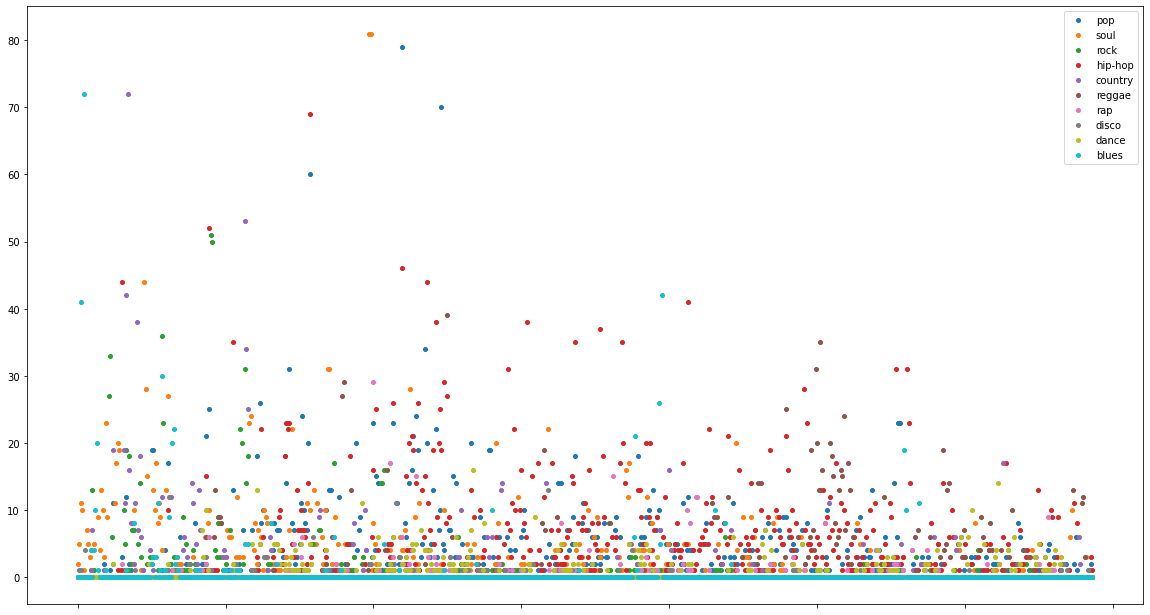

In [28]:
# visualization of artists performance in every genre

ax = genres_by_artist.plot(marker='o', ms=4, linestyle='', figsize=(20,11))
a = ax.xaxis.set_ticklabels([])

In [29]:
d = {}
for index, row in genres_by_artist.iterrows():
    a = row.to_dict()
    a = dict(sorted(a.items(), key=lambda x: x[1], reverse=True)[:2])
    a = sorted(a.items(), key=lambda x: x[0])
    if ((a[0][1] > genre_mean[a[0][0]]) and (a[1][1] > genre_mean[a[1][0]])):
        l = list()
        l.append(a[0][0])
        l.append(a[0][1])
        l.append(a[1][0])
        l.append(a[1][1])
        g = list()
        g.append(str(a[0][0]))
        g.append(str(a[1][0]))
        l.append(g)
        l.append(a[0][1] + a[1][1])
        d[index] = l
d = dict(sorted(d.items(), key=lambda x: x[1][3], reverse=True))
columns = ['Genre_1', 'Track_1', 'Genre_2', 'Track_2', 'Genres_Top2', 'Tracks_Top2']
df = pd.DataFrame.from_dict(d, orient='index', columns=columns)
df.sort_values(by=['Tracks_Top2'], ascending=False)

# artists & top2 genre performances, in each over the mean 

Genre_1  Track_1 Genre_2  Track_2      Genres_Top2  \
Lil Wayne       hip-hop       69     pop       60   [hip-hop, pop]   
JAY-Z           hip-hop       46     pop       79   [hip-hop, pop]   
Drake           hip-hop       19     pop       70   [hip-hop, pop]   
Jerry Garcia    country       53    rock       31  [country, rock]   
Snoop Dogg      hip-hop       52     pop       25   [hip-hop, pop]   
...                 ...      ...     ...      ...              ...   
Travis Scott        pop        7     rap        5       [pop, rap]   
Donny Hathaway    disco        3    soul        9    [disco, soul]   
Gwen Stefani      dance        5     pop        6     [dance, pop]   
George Benson     disco        3    soul        8    [disco, soul]   
Britney Spears      pop        7     rap        3       [pop, rap]   

                Tracks_Top2  
Lil Wayne               129  
JAY-Z                   125  
Drake                    89  
Jerry Garcia             84  
Snoop Dogg               77  
...                     ...  
Travis Scott             12  
Donny Hathaway           12  
Gwen Stefani             11  
George Benson            11  
Britney Spears           10  

[112 rows x 6 columns]

In [30]:
genre_pairs = df.Genres_Top2.tolist()
unique_genre_pairs = [list(x) for x in set(tuple(x) for x in genre_pairs)]
unique_genre_pairs

[['dance', 'pop'],
 ['pop', 'rap'],
 ['country', 'pop'],
 ['disco', 'soul'],
 ['blues', 'rock'],
 ['blues', 'disco'],
 ['blues', 'pop'],
 ['blues', 'soul'],
 ['hip-hop', 'pop'],
 ['reggae', 'rock'],
 ['country', 'rock'],
 ['hip-hop', 'soul'],
 ['hip-hop', 'rap'],
 ['hip-hop', 'reggae'],
 ['pop', 'soul']]

In [222]:
# Genre pairs and their representatives

for pairs in unique_genre_pairs:
    print(pairs)
    print(df[(df['Genre_1']==pairs[0]) & (df['Genre_2']==pairs[1])][['Track_1', 'Track_2','Tracks_Top2']].sort_values(by=['Tracks_Top2'], ascending=False).head())

['dance', 'pop']
                   Track_1  Track_2  Tracks_Top2
Mariah Carey            13       18           31
Justin Timberlake        6       14           20
David Guetta             6       14           20
Ciara                    6       11           17
Calvin Harris            7        7           14
['pop', 'rap']
                Track_1  Track_2  Tracks_Top2
Kanye West           23       29           52
Chris Brown          24       15           39
Jennifer Lopez       14        8           22
will.i.am            10        4           14
Travis Scott          7        5           12
['country', 'pop']
              Track_1  Track_2  Tracks_Top2
Dolly Parton       19       11           30
['disco', 'soul']
                    Track_1  Track_2  Tracks_Top2
The Isley Brothers       13       22           35
Roberta Flack             3       10           13
Donny Hathaway            3        9           12
George Benson             3        8           11
['blues', 'rock']
     

# How does the network change over the years? 

In [394]:

for year in range(1961, 2019, 2):
    G_evolving = nx.MultiGraph()
    print(year)
    for n1,n2,track in G.edges(data=True):
        if track['Year'] <= year:
            G_evolving.add_edges_from([(n1, n2, track)])
    dg = sorted(G_evolving.degree, key=lambda x: x[1], reverse=True)
    print('size of the network = ', len(G_evolving))
    g1 =[len(c) for c in sorted(nx.connected_components(G_evolving), key=len, reverse=True)]
    print('size of biggest component = ' + str(g1[0]))
    print('number of components = '+str(nx.number_connected_components(G_evolving)))
    print('Top2 artists:',dg[0])
          

1961
size of the network =  5
size of biggest component = 3
number of components = 2
Top2 artists: ('The Jordanaires', 11)
1963
size of the network =  13
size of biggest component = 3
number of components = 6
Top2 artists: ('The Jordanaires', 27)
1965
size of the network =  17
size of biggest component = 3
number of components = 8
Top2 artists: ('The Jordanaires', 27)
1967
size of the network =  26
size of biggest component = 3
number of components = 12
Top2 artists: ('The Jordanaires', 27)
1969
size of the network =  35
size of biggest component = 3
number of components = 16
Top2 artists: ('The Jordanaires', 27)
1971
size of the network =  45
size of biggest component = 3
number of components = 20
Top2 artists: ('The Jordanaires', 27)
1973
size of the network =  59
size of biggest component = 3
number of components = 26
Top2 artists: ('Marvin Gaye', 40)
1975
size of the network =  63
size of biggest component = 5
number of components = 27
Top2 artists: ('Marvin Gaye', 40)
1977
size of

In [33]:

def get_current_network(year):
    G_current = nx.MultiGraph()
    for n1,n2,track in G.edges(data=True):
        if track['Year'] <= year:
            G_current.add_edges_from([(n1, n2, track)])
#     dg = sorted(G_evolving.degree, key=lambda x: x[1], reverse=True)
#     print('G:')
#     print(dg)
    plt.clf()
    nx.draw_spring(G_current, node_size=1, with_labels=False)
    plt.show()
    
import ipywidgets as widgets

@widgets.interact(x=(1961, 2019))
def f(x=1960):
    get_current_network(x)

# show the structure of the growing network in the selected year

interactive(children=(IntSlider(value=1961, description='x', max=2019, min=1961), Output()), _dom_classes=('wi…

In [94]:
import matplotlib.animation
from IPython.display import HTML
from functools import partial

years = list(range(1961, 2019))
# years = list(range(1998,2000))
nodes_list = np.array(list(G.nodes()))


node_colors = ['None'] * len(G)
edge_colors = ['None'] * G.size()

pos = nx.spring_layout(G)


def update(num, ax):
#     plt.clf()
#     plt.cla()
    ax.clear()
    global node_colors, edge_colors
    if num == 0:
        node_colors = ['None'] * len(G)
        edge_colors = ['None'] * G.size()
    year = years[num]
    ax.set_title('Year = ' + str(year), fontsize=20)
    index = -1
    for n1, n2, track in G.edges(data=True):
        index += 1
        if track['Year'] == year:
            index1 = np.where(nodes_list == n1)[0][0]
            index2 = np.where(nodes_list == n2)[0][0]
            node_colors[index1] = 'blue'
            node_colors[index2] = 'blue'
            edge_colors[index] = 'black'
    
    edge_c = edge_colors
    node_c = node_colors
    
    nx.draw(G, pos, node_size=1, with_labels=False, edge_color=edge_c, node_color=node_c, ax=ax)
    
fig, ax = plt.subplots(figsize=(10, 10))
upd = partial(update,ax=ax)
ani = matplotlib.animation.FuncAnimation(fig, upd, frames=len(years), interval=200, repeat=True)
plt.close()

In [95]:
HTML(ani.to_html5_video())

# annimation for network growing over the years

In [96]:
ani.save('growing.mp4', writer='ffmpeg')
plt.close()

# How robust is the network?

In [77]:
import decimal
import random as rd

def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)
    

fractions_list = list(drange(0,1,0.02))
G_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)


x_values = []
y_nodes_values = []
y_links_values = []
y_attacks_values = []
removed_nodes_number = []

# measure robustness for random failure on nodes and linkes(multiple links are ignored), and for attacks (on hubs)

for fraction in fractions_list:
    
    G_copy = G.copy()
    G_weighted_copy  = G_weighted.copy()
    G_attack_copy = G.copy()
    
#   Nodes
    removed_nodes = 0
    for n in G.nodes():
        r = rd.random()
        if r <= fraction:
            G_copy.remove_node(n)
            removed_nodes += 1
    g_nodes =[len(c) for c in sorted(nx.connected_components(G_copy), key=len, reverse=True)]
    a = g_nodes[0] / len(G)
    x_values.append(fraction)
    y_nodes_values.append(a)
    removed_nodes_number.append(removed_nodes)
    
#   Links
    removed_links = 0
    for n1,n2 in G_weighted_copy.edges():
        r = rd.random()
        if r <= fraction:
            G_weighted_copy.remove_edge(n1, n2)
            removed_links += 1
    g_links =[len(c) for c in sorted(nx.connected_components(G_weighted_copy), key=len, reverse=True)]
    a = g_links[0] / len(G_weighted)
    y_links_values.append(a)
    
#   attacks
    for node in range(removed_nodes):
        G_attack_copy.remove_node(G_by_degree[node][0])
    g_attacks =[len(c) for c in sorted(nx.connected_components(G_attack_copy), key=len, reverse=True)]
    a_attacks = g_attacks[0] / len(G)
    y_attacks_values.append(a_attacks)
            

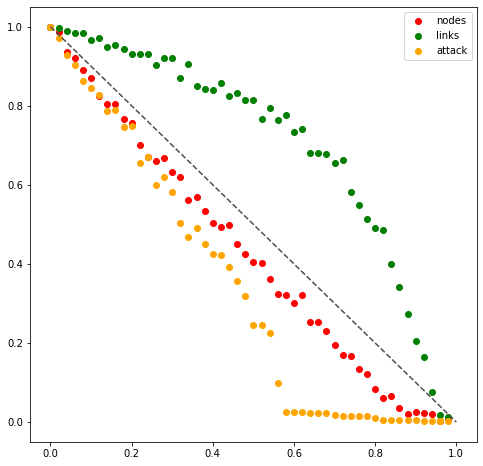

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_nodes_values, color='red',label="nodes")
plt.scatter(x_values, y_links_values, color='green', label="links")
plt.scatter(x_values, y_attacks_values, color='orange', label="attack")
plt.plot([0, 1], [1, 0], ls="--", c=".3")
plt.legend()
plt.show()

# fraction of nodes in the giant component (y)
# fraction of network removed due node/link failure or attack (x)

In [97]:
edges_weighted = list(G_weighted.edges)
edges_weighted = [tuple(sorted(item)) for item in edges_weighted]

node_colors = ['red'] * len(G_weighted)
edge_colors = ['black'] * G_weighted.size()

G_weighted = G_weighted_secret_copy
pos = nx.spring_layout(G_weighted)

def random_node_failure(num, ax):
    G_weighted_help = G_weighted.copy()
    global node_colors, edge_colors, edges_weighted
    ax.clear()
    node_colors = ['red'] * len(G_weighted)
    edge_colors = ['black'] * G_weighted.size()
    fraction = fractions_list[num]
    ax.set_title('Fraction = ' + str(fraction), fontsize=20)
    for node in G_weighted.nodes():
        r = rd.random()
        if r <= fraction:
            index_node = np.where(nodes_list == node)[0][0]
            node_colors[index_node] = 'None'
            G_weighted_help.remove_node(node)
            for edge in G_weighted.edges(node):
                edge_sorted = tuple(sorted(edge))
                index = edges_weighted.index(edge_sorted)
                edge_colors[index] = 'None'
                if G_weighted_help.has_edge(*edge):
                    G_weighted_help.remove_edge(edge)
        if G_weighted_help.has_node(node):
            if G_weighted_help.degree[node] == 0:
                index_node = np.where(nodes_list == node)[0][0]
                node_colors[index_node] = 'None'
    
    edge_c = edge_colors
    node_c = node_colors


    nx.draw(G_weighted, pos, node_size=1, with_labels=False, edge_color=edge_c, node_color=node_c, ax=ax)


fig_node, ax_node = plt.subplots(figsize=(10, 10))
upd_node_failure = partial(random_node_failure,ax=ax_node)
ani_node = matplotlib.animation.FuncAnimation(fig_node, upd_node_failure, frames=len(fractions_list), interval=300, repeat=True)
plt.close()
    


In [ ]:
# annimation for network structure in case of random failure on nodes

In [103]:
HTML(ani_node.to_html5_video())

In [104]:
ani_node.save('node_failure.mp4', writer='ffmpeg')
plt.close()

In [100]:
node_colors = ['green'] * len(G_weighted)
edge_colors = ['black'] * G_weighted.size()

G_weighted = G_weighted_secret_copy

def random_link_failure(num, ax):
    global node_colors, edge_colors
    G_weighted_help = G_weighted.copy()
    ax.clear()
    node_colors = ['green'] * len(G_weighted)
    edge_colors = ['black'] * G_weighted.size()
    fraction = fractions_list[num]
    ax.set_title('Fraction = ' + str(fraction), fontsize=20)
    for n1,n2 in G_weighted.edges():
        r = rd.random()
        if r <= fraction:
            edge = (n1,n2)
            edge = tuple(sorted(edge))
            index = edges_weighted.index(edge)
            edge_colors[index] = 'None'
            G_weighted_help.remove_edge(*edge)
            if G_weighted_help.degree[n1] == 0:
                index_node = np.where(nodes_list == n1)[0][0]
                node_colors[index_node] = 'None'
            if G_weighted_help.degree[n2] == 0:
                index_node = np.where(nodes_list == n1)[0][0]
                node_colors[index_node] = 'None'
            
    for node in G_weighted_help.nodes():
        if G_weighted_help.degree[node] == 0:
            index_node = np.where(nodes_list == node)[0][0]
            node_colors[index_node] = 'None'
    
    edge_c = edge_colors
    node_c = node_colors
    
    nx.draw(G_weighted, pos, node_size=1, with_labels=False, edge_color=edge_c, node_color=node_c, ax=ax)


fig, ax = plt.subplots(figsize=(10, 10))
upd_link_failure = partial(random_link_failure,ax=ax)
ani_link = matplotlib.animation.FuncAnimation(fig, upd_link_failure, frames=len(fractions_list), interval=300, repeat=True)
plt.close()

In [ ]:
# annimation for network structure in case of random failure on links

In [105]:
HTML(ani_link.to_html5_video())

In [106]:
ani_link.save('edge_failure.mp4', writer='ffmpeg')
plt.close()

In [112]:
node_colors = ['orange'] * len(G_weighted)
edge_colors = ['black'] * G_weighted.size()

def attack(num, ax):
    global node_colors, edge_colors
    G_weighted_help = G_weighted.copy()
    ax.clear()
    number_of_attacks = removed_nodes_number[num]
    ax.set_title('Number of attacks = ' + str(num), fontsize=20)
    for attack in range(number_of_attacks):
        node = G_by_degree[attack][0]
        index_node = np.where(nodes_list == node)[0][0]
        node_colors[index_node] = 'None'
        for edge in G_weighted.edges(node):
                edge_sorted = tuple(sorted(edge))
                index = edges_weighted.index(edge_sorted)
                edge_colors[index] = 'None'
                if G_weighted_help.has_edge(*edge):
                    G_weighted_help.remove_edge(*edge)
        G_weighted_help.remove_node(node)
    
    for node in G_weighted_help.nodes():
        if G_weighted_help.degree[node] == 0:
            index_node = np.where(nodes_list == node)[0][0]
            node_colors[index_node] = 'None'
    
    edge_c = edge_colors
    node_c = node_colors
    
    nx.draw(G_weighted, pos, node_size=1, with_labels=False, edge_color=edge_c, node_color=node_c, ax=ax)


fig, ax = plt.subplots(figsize=(10, 10))
upd_attack = partial(attack,ax=ax)
ani_attack = matplotlib.animation.FuncAnimation(fig, upd_attack, frames=len(removed_nodes_number), interval=400, repeat=True)
plt.close()

In [ ]:
# annimation for network structure in case of attack

In [110]:
HTML(ani_attack.to_html5_video())

In [113]:
ani_attack.save('attack.mp4', writer='ffmpeg')
plt.close()

#  Community detection

Using the Louvain algorithm for community detection.

In [271]:
from community import community_louvain
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm

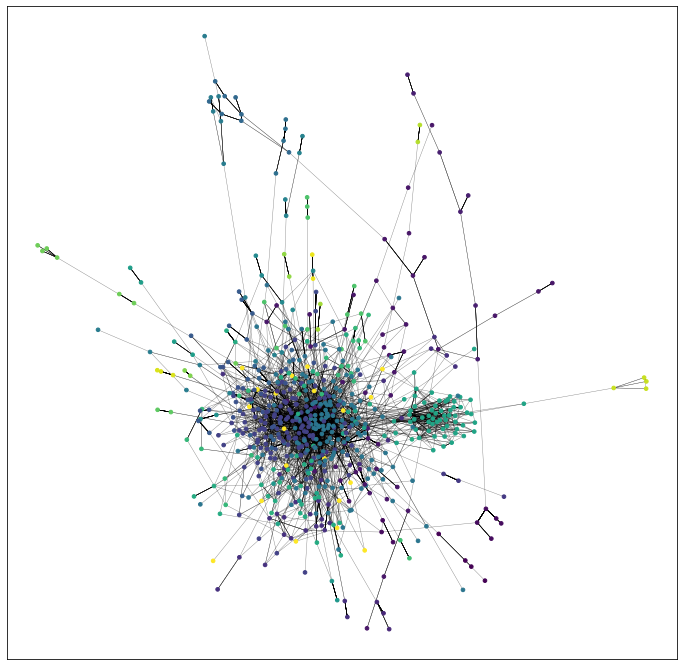

In [265]:
# Community detection in the MultiGraph

partition = community_louvain.best_partition(G)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=13, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.4)
plt.show()

In [272]:
modularity = community_louvain.modularity(partition, G)
print('Modularity of the partition = ', modularity)

communities_nr = len(set(partition.values()))
print('Number of communities = ', communities_nr)

Modularity of the partition =  0.20866337861007422
Number of communities =  37


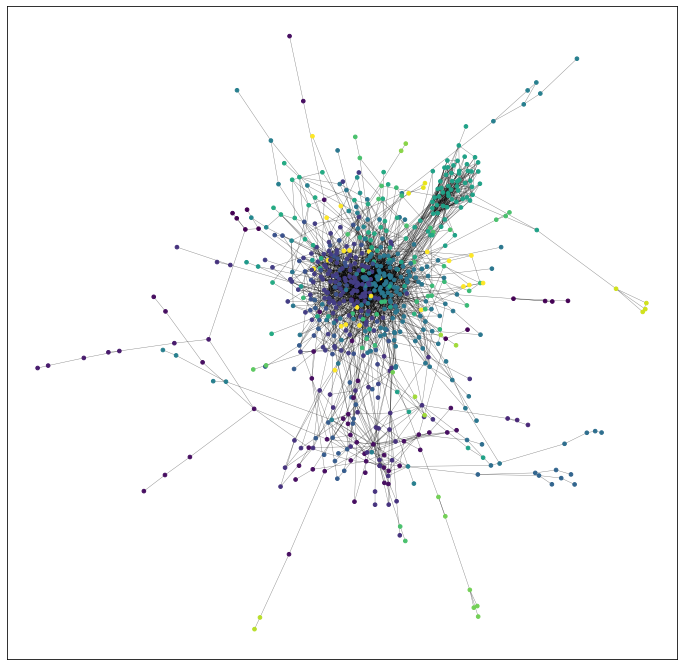

In [273]:
# Community detection in the weighted Graph

partition_w = community_louvain.best_partition(G_weighted)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_weighted)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition_w.values()) + 1)
nx.draw_networkx_nodes(G_weighted, pos, partition.keys(), node_size=13, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_weighted, pos, alpha=0.5, width=0.4)
plt.show()

In [281]:
modularity_w = community_louvain.modularity(partition_w, G_weighted)
print('Modularity of the partition = ', modularity_w)

communities_nr_w = len(set(partition_w.values()))
print('Number of communities = ', communities_nr_w)

comm_list = list(partition_w.values())
occurrences = collections.Counter(comm_list)
occurrences = dict(sorted(occurrences.items(), key=lambda x: x[1], reverse=True))
print(occurrences)
 

Modularity of the partition =  0.6791362608343608
Number of communities =  29
{1: 181, 11: 58, 25: 58, 24: 48, 4: 38, 27: 37, 6: 34, 2: 31, 10: 27, 23: 23, 9: 22, 22: 20, 7: 17, 21: 15, 17: 10, 8: 8, 18: 8, 19: 7, 28: 6, 5: 6, 3: 5, 0: 5, 20: 4, 26: 4, 15: 4, 16: 4, 14: 3, 12: 2, 13: 2}


In [388]:
communities = {}
for comm in range(communities_nr_w):
    c = [node for node, c_value in partition_w.items() if c_value == comm]
    members = len(c)
    total_degrees = 0
    inside_edges = 0
    inside_degrees = 0
    genre_dict = {}
    year_min = 2018
    year_max = 1960
    year_sum = 0
    popularity_sum = 0
    popularity_min = 100
    popularity_max = 20
    l = []
    l.append(members)
    for n1 in range(len(c)):
        total_degrees += G.degree[c[n1]]
        for n2 in range(n1 + 1,len(c)):
            node1 = c[n1]
            node2 = c[n2]
            if G.has_edge(node1,node2):
                edges = G.get_edge_data(node1, node2)
                for edge in edges.values():
                    inside_degrees +=2
                    inside_edges += 1
                    genre = edge['Genre']
                    year = edge['Year']
                    popularity = edge['Popularity']
                    if popularity < popularity_min:
                        popularity_min = popularity
                    if popularity > popularity_max:
                        popularity_max = popularity
                    popularity_sum += popularity
                    if genre in genre_dict.keys():
                        genre_dict[genre] += 1
                    else:
                        genre_dict[genre] = 1
                    if year < year_min:
                        year_min = year
                    if year > year_max:
                        year_max = year
                    year_sum += year
     
    
    first_genre = sorted(genre_dict.items(), key=lambda item: item[1], reverse=True)[0]
    top_genre = first_genre[0]
    
    tracks_in_top_genre = first_genre[1]
    year_avg = year_sum / inside_edges
    year_diff = year_max - year_min
    popularity_diff = popularity_max - popularity_min
    l.append(total_degrees)
    l.append(inside_degrees)
    l.append(inside_edges)
    l.append(top_genre)
    l.append(tracks_in_top_genre / inside_edges)
    l.append(year_min)
    l.append(year_max)
    l.append(year_avg)
    l.append(year_diff)
    l.append(popularity_min)
    l.append(popularity_max)
    l.append(popularity_sum / inside_edges)
    l.append(popularity_diff)
    
    communities[comm] = l

columns = ['Number of nodes', 'Total degrees', 'Inside degrees', 'Number of tracks', 'Top genre',
           'Fraction of tracks in top genre', 'Min year', 'Max year', 'Avg year', 'Year difference',
           'Min popularity', 'Max popularity', 'Avg track popularity', 'Popularity difference']
communities_df = pd.DataFrame.from_dict(communities, orient='index', columns=columns)
communities_df

# Although the communities are detected in the weighted network topology,
# the following statistics for the communities are using the MultiGraph (multiple edges between two nodes)

Number of nodes  Total degrees  Inside degrees  Number of tracks  \
0                 5             86              76                38   
1               181           3476            2742              1371   
2                31            608             382               191   
3                 5            166             164                82   
4                38            496             444               222   
5                 6             65              64                32   
6                34            416             236               118   
7                17            175             172                86   
8                 8            170             160                80   
9                22            431             388               194   
10               27            482             440               220   
11               58            639             436               218   
12                2            168             166                83   
13                2             35              32                16   
14                3             41              40                20   
15                4             33              32                16   
16                4             17              16                 8   
17               10            156             126                63   
18                8            155             154                77   
19                7             98              92                46   
20                4             73              72                36   
21               15            217             174                87   
22               20            256             164                82   
23               23            260             186                93   
24               48            369             252               126   
25               58            973             912               456   
26                4            193             192                96   
27               37            423             346               173   
28                6             71              70                35   

   Top genre  Fraction of tracks in top genre  Min year  Max year  \
0    hip-hop                         0.921053      2003      2017   
1        pop                         0.401167      1973      2017   
2    hip-hop                         0.649215      1978      2017   
3      blues                         0.865854      1963      2005   
4    country                         0.310811      1961      2017   
5        pop                         0.625000      1980      2006   
6        pop                         0.449153      1986      2017   
7       soul                         0.988372      1961      2013   
8       rock                         0.787500      1969      2012   
9      blues                         0.314433      1965      2017   
10   country                         0.663636      1967      2016   
11      soul                         0.440367      1985      2017   
12      soul                         0.975904      1978      2009   
13     dance                         0.875000      2003      2004   
14      soul                         0.950000      1973      2005   
15    reggae                         1.000000      2011      2017   
16   hip-hop                         0.625000      2010      2017   
17      soul                         0.682540      1972      2017   
18     blues                         0.753247      1992      2015   
19      soul                         0.369565      1972      2013   
20       pop                         0.527778      1986      2007   
21   hip-hop                         0.954023      1991      2010   
22   hip-hop                         0.695122      2010      2017   
23   hip-hop                         0.430108      1996      2017   
24     dance                         0.253968      1971      2017   
25    reggae                         0.664474    

In [389]:
communities_df.describe()

Number of nodes  Total degrees  Inside degrees  Number of tracks  \
count        29.000000      29.000000       29.000000         29.000000   
mean         23.689655     370.620690      301.034483        150.517241   
std          34.632874     637.885033      505.281992        252.640996   
min           2.000000      17.000000       16.000000          8.000000   
25%           5.000000      86.000000       76.000000         38.000000   
50%          10.000000     175.000000      166.000000         83.000000   
75%          31.000000     423.000000      346.000000        173.000000   
max         181.000000    3476.000000     2742.000000       1371.000000   

       Fraction of tracks in top genre     Min year     Max year     Avg year  \
count                        29.000000    29.000000    29.000000    29.000000   
mean                          0.652579  1981.758621  2013.862069  1998.374017   
std                           0.226255    15.373110     4.517617     9.821596   
min                           0.253968  1961.000000  2004.000000  1983.050000   
25%                           0.449153  1971.000000  2012.000000  1989.918919   
50%                           0.657143  1978.000000  2017.000000  1997.427746   
75%                           0.865854  1992.000000  2017.000000  2006.128440   
max                           1.000000  2011.000000  2017.000000  2013.687500   

       Year difference  Min popularity  Max popularity  Avg track popularity  \
count        29.000000       29.000000       29.000000             29.000000   
mean         32.103448       21.620690       69.206897             36.589750   
std          15.566321        4.546693        9.832088              6.356978   
min           1.000000       20.000000       50.000000             27.739583   
25%          21.000000       20.000000       62.000000             31.942857   
50%          32.000000       20.000000       69.000000             35.125000   
75%          44.000000       21.000000       77.000000             40.631579   
max          56.000000       43.000000       86.000000             52.036585   

       Popularity difference  
count              29.000000  
mean               47.586207  
std                11.555819  
min                14.000000  
25%                42.000000  
50%                48.000000  
75%                57.000000  
max                66.000000

### This part was implemented by Agnes.

# Barabasi-Albert Model

In [453]:
ba_model = nx.barabasi_albert_graph(n=N_w, m=4);
N_ba = len(ba_model);
L_ba = len(ba_model.edges());

def degrees(graph):
    return [graph.degree(node) for node in graph];

def getDegreeDistribution(G):
    N=len(G)
    degree_sequence=sorted([d for n, d in G.degree()], reverse=True)
    degreeCount=collections.Counter(degree_sequence)
    deg, cnt=zip(*degreeCount.items())
    
    pmf = [c/N for c in cnt]
    return deg, pmf

print("N=", N_w);
print("N ba=", N_ba);
print("");
print("L=", L_w);
print("L ba=", L_ba);
print("");
print("min of degree=", np.min(degrees(G_weighted)));
print("min of degree-ba=", np.min(degrees(ba_model)));
print("");
print("max of degree=", np.max(degrees(G_weighted)));
print("max of degree-ba=", np.max(degrees(ba_model)));
print("");
print("average degree=",np.mean(degrees(G_weighted)));
print("average degree-ba=",np.mean(degrees(ba_model)));
print("");
print("std of degrees=",np.std(degrees(G_weighted)));
print("std of degrees-ba=",np.std(degrees(ba_model)));
print()


N= 687
N ba= 687

L= 2623
L ba= 2732

min of degree= 1
min of degree-ba= 4

max of degree= 63
max of degree-ba= 120

average degree= 7.636098981077147
average degree-ba= 7.953420669577874

std of degrees= 8.070560798003967
std of degrees-ba= 8.108122103709078



In [454]:
print('Average clustering=',average_clustering(G_weighted, trials=1000));
print('Average clustering-ba=',average_clustering(ba_model, trials=1000));
print("");
print('Estimated path length=', estimate_path_length(G_weighted));
print('Estimated path length-ba=', estimate_path_length(ba_model));
print('')
print("avg shortest path=",nx.average_shortest_path_length(G_weighted));
print("avg shortest path-ba=",nx.average_shortest_path_length(ba_model));
print('')
print('Diameter=', nx.diameter(G_weighted))
print('Diameter-ba=', nx.diameter(ba_model))

Average clustering= 0.103
Average clustering-ba= 0.036

Estimated path length= 4.275
Estimated path length-ba= 3.099

avg shortest path= 4.358477514524212
avg shortest path-ba= 3.0700005516866757

Diameter= 15
Diameter-ba= 5


### Degree distribution comparison

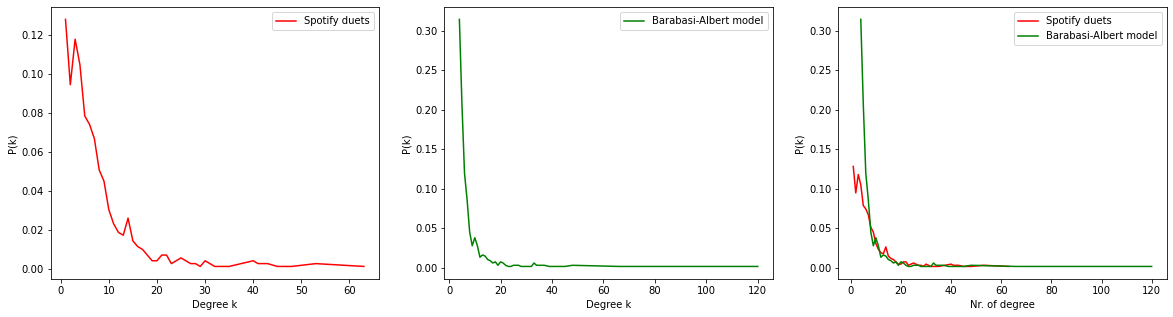

In [455]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
deg_sif, pmf_sif = getDegreeDistribution(G_weighted)
plt.plot(deg_sif, pmf_sif, color='r', label="Spotify duets")
plt.legend()
plt.xlabel("Degree k")
plt.ylabel("P(k)")

plt.subplot(1,3,2)
deg_ba, pmf_ba = getDegreeDistribution(ba_model)
plt.plot(deg_ba, pmf_ba, color='g', label="Barabasi-Albert model")
plt.legend()
plt.xlabel("Degree k")
plt.ylabel("P(k)")

plt.subplot(1,3,3)
plt.plot(deg_sif, pmf_sif, color='r', label="Spotify duets")
plt.plot(deg_ba, pmf_ba, color='g', label="Barabasi-Albert model")
plt.legend()
plt.xlabel('Nr. of degree')
plt.ylabel('P(k)')

plt.show()

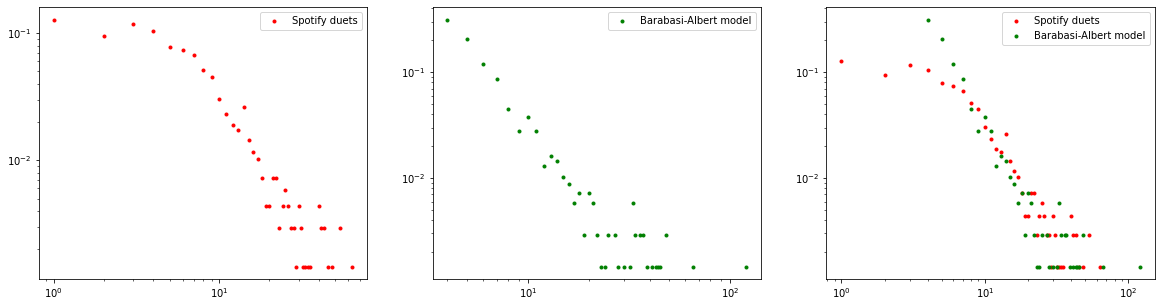

In [456]:
plt.figure(figsize=(20,5))
options = dict(ls='', marker='.')

plt.subplot(1,3,1)
plt.loglog(deg_sif, pmf_sif, label='Spotify duets', color='r', **options)
plt.legend()

plt.subplot(1,3,2)
plt.loglog(deg_ba, pmf_ba, label='Barabasi-Albert model', color='g', **options)
plt.legend()

plt.subplot(1,3,3)
plt.loglog(deg_sif, pmf_sif, label='Spotify duets', color='r', **options)
plt.loglog(deg_ba, pmf_ba, label='Barabasi-Albert model', color='g', **options)
plt.legend()



plt.show()

### Cumulative distributions

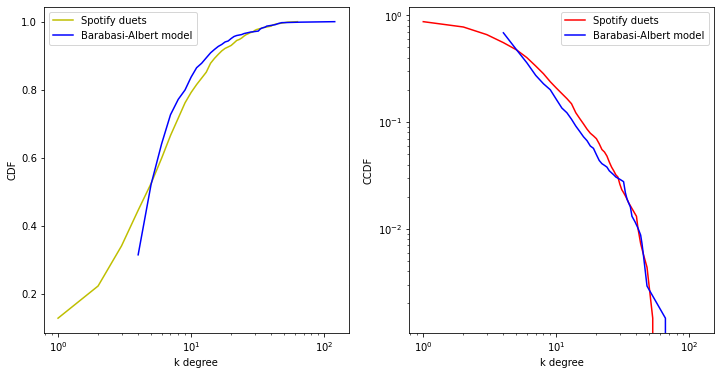

In [457]:
def cumulative_prob(pmf, x):
        ps=[pmf[value] for value in pmf if value<=x]
        return np.sum(ps)

def getDegreePmf(G):
    N=len(G)
    degree_sequence = sorted([d for n, d in G.degree()])
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    pmf = [c/N for c in cnt]
    d = {}
    for i,val in enumerate(deg):
        d[val] = pmf[i]
    return d

def getDegreeCdf(G):
    pmf=getDegreePmf(G)
    cdf = {}
    for k in pmf.keys():
        cdf[k]=cumulative_prob(pmf, k)
    return cdf    

cdf_sif = getDegreeCdf(G_weighted)
cdf_ba = getDegreeCdf(ba_model)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(list(cdf_sif.keys()), list(cdf_sif.values()), label='Spotify duets', color='y')
plt.plot(list(cdf_ba.keys()), list(cdf_ba.values()), label='Barabasi-Albert model', color='b')
plt.xscale('log')
plt.xlabel('k degree')
plt.ylabel('CDF')
plt.legend();

plt.subplot(1,2,2)
sif_comp_cdf = [1-z for z in cdf_sif.values()]
plt.loglog(cdf_sif.keys(), sif_comp_cdf, label='Spotify duets', color='r')
ba_comp_cdf = [1-z for z in cdf_ba.values()]
plt.loglog(cdf_ba.keys(), ba_comp_cdf, label='Barabasi-Albert model', color='b')
plt.xlabel('k degree')
plt.ylabel('CCDF')
plt.legend();

plt.show()

### Clustering Coefficient Distribution

In [458]:
from collections import OrderedDict

cc=nx.clustering(G_weighted)
sort_cc = OrderedDict(sorted(cc.items(), key=lambda x: x[1]))
print ( 'Number of nodes where CC=1.00 -', sum(value == 1.0 for value in sort_cc.values()))
print ( 'Number of nodes where CC=0.00 -', sum(value == 0.0 for value in sort_cc.values()))

cc_ba = nx.clustering(ba_model)
sort_ba = OrderedDict(sorted(cc_ba.items(), key=lambda x: x[1]))
print ( 'BA-Number of nodes where CC=1.00 -', sum(value == 1.0 for value in sort_ba.values()))
print ( 'BA-Number of nodes where CC=0.00 -', sum(value == 0.0 for value in sort_ba.values()))

Number of nodes where CC=1.00 - 8
Number of nodes where CC=0.00 - 278
BA-Number of nodes where CC=1.00 - 0
BA-Number of nodes where CC=0.00 - 389


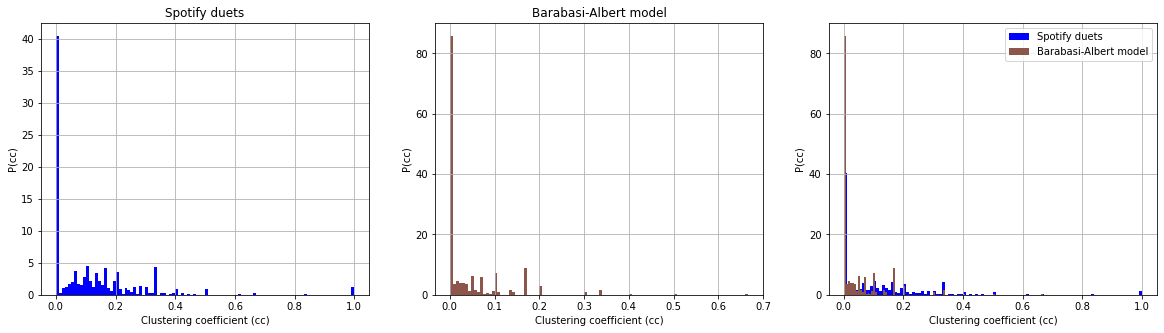

In [459]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.hist(cc.values(), bins=100, density=True, color='b')
plt.grid(True)
plt.title('Spotify duets')
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")

plt.subplot(1,3,2)
plt.hist(cc_ba.values(), bins=100, density=True, color='C35')
plt.grid(True)
plt.title("Barabasi-Albert model")
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")

plt.subplot(1,3,3)
plt.hist(cc.values(), bins=100, density=True,label='Spotify duets', color='b')
plt.hist(cc_ba.values(), bins=100, density=True,label='Barabasi-Albert model', color='C35')
plt.legend()
plt.grid(True)
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")
plt.show()

### Betweeness centrality distribution

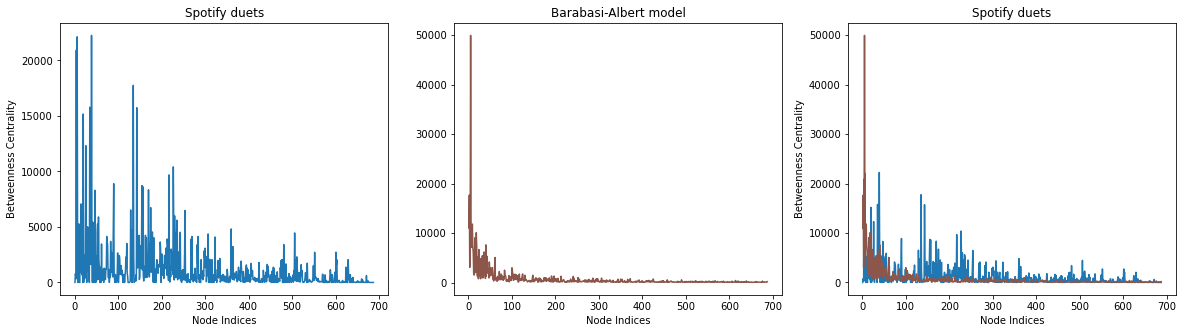

In [492]:
plt.figure(figsize=(20,5))

bc = nx.betweenness_centrality(G_weighted, normalized=False)
bc = np.asarray(list(bc.values()))

bc_ba = nx.betweenness_centrality(ba_model, normalized=False)
bc_ba = np.asarray(list(bc_ba.values()))

num_nodes = len(G_weighted.nodes())
nodes_axis = range(1, num_nodes + 1)

plt.subplot(1,3,1)
plt.plot(nodes_axis, bc)
plt.title('Spotify duets')
plt.xlabel('Node Indices')
plt.ylabel('Betweenness Centrality')

plt.subplot(1,3,2)
plt.title("Barabasi-Albert model")
plt.plot(nodes_axis, bc_ba, color='C75')
plt.xlabel('Node Indices')

plt.subplot(1,3,3)
plt.title('Spotify duets')
plt.plot(nodes_axis, bc)
plt.plot(nodes_axis, bc_ba, color='C75')
plt.ylabel('Betweenness Centrality')
plt.xlabel('Node Indices')

plt.show()

## Visualization

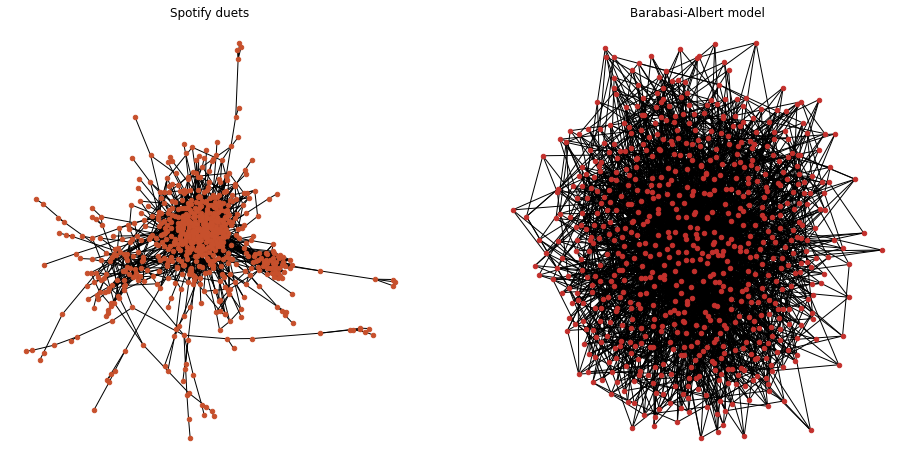

In [461]:
fig=plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Spotify duets')
nx.draw_spring(G_weighted, node_size=20, node_color="#c7502c")

plt.subplot(1,2,2)
plt.title("Barabasi-Albert model")
nx.draw_spring(ba_model, node_size=20, node_color="#c3302c")

## Random network model

In [403]:
def random_pars(nodes, p):
    for edge in all_pairs(nodes):
        if np.random.random() < p:
            yield edge #yield enables a function to suspend and resume while it turns in a value at the time of the suspension of the execution

In [404]:
def make_random_graph(n,p):
    G = nx.Graph() #create empty graph
    nodes = range(n) #1,2,3,...,n
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

In [405]:
def degrees(graph):
    return [graph.degree(node) for node in graph];

In [406]:
def getDegreeDistribution(G):
    N=len(G)
    degree_sequence=sorted([d for n, d in G.degree()], reverse=True)
    degreeCount=collections.Counter(degree_sequence)
    deg, cnt=zip(*degreeCount.items())
    
    pmf = [c/N for c in cnt]
    return deg, pmf

In [407]:
def sample_path_lengths(G, nodes=None, trials=1000):
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) for pair in pairs]
    return lengths

In [408]:
def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials));

## Erdos-Renyi model

In nx.erdos_renyi_graph(n, p, seed=None, directed=False) n is the number of nodes and p is the probabilty of edge creation.

The original network has 687 nodes. That means that a complete graph with 687 nodes has 687*687/2=235984 edges.

To obtain an erdos-renyi artificial network we need to find p. p = 2623/235984 = 0.011 

In [462]:
er_model = nx.erdos_renyi_graph(n=N_w, p=0.011, seed=165)

In [463]:
nx.is_connected(er_model)

False

<b>The Erdos-Renyi artificial network is not connected.</b>

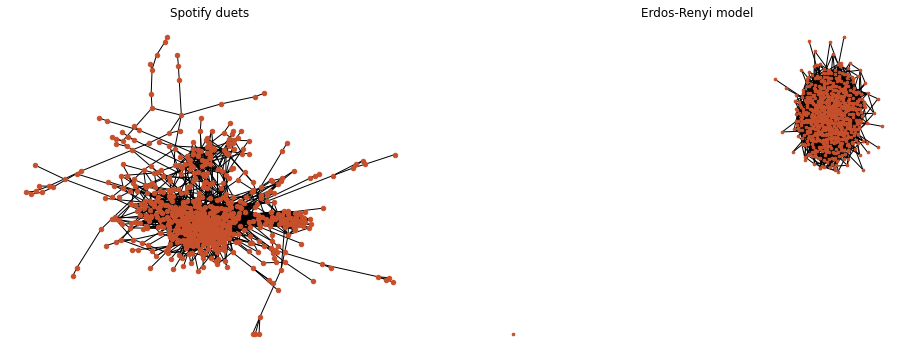

In [466]:
#biggest connected component
giant_component_nodes = max(nx.connected_components(er_model), key=len)
giant_subgraph = er_model.subgraph(giant_component_nodes)

fig=plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Spotify duets')
nx.draw_spring(G_weighted, node_size=20, node_color="#c7502c")

plt.subplot(1,2,2)
plt.title('Erdos-Renyi model')
nx.draw_spring(er_model, node_size=7, node_color="#c7502c")

plt.show()

## Description

In [486]:
N_er = len(er_model)
L_er = len(er_model.edges())

print('N=',N_w)
print('N-er=',N_er)
print('p = 0.011')

print("")


print('L=',L_w)
print('L-er=', L_er)

print("min of degree=", np.min(degrees(G_weighted)));
print("min of degree-er=", np.min(degrees(er_model)));
print("");
print("max of degree=", np.max(degrees(G_weighted)));
print("max of degree-er=", np.max(degrees(er_model)));
print("");
print("average degree=",np.mean(degrees(G_weighted)));
print("average degree-er=",np.mean(degrees(er_model)));
print("");
print("std of degrees=",np.std(degrees(G_weighted)));
print("std of degrees-er=",np.std(degrees(er_model)));
print('')
print('Diameter=',nx.diameter(G_weighted))
print('Diameter -er=',nx.diameter(giant_subgraph))

N= 687
N-er= 687
p = 0.011

L= 2623
L-er= 2581
min of degree= 1
min of degree-er= 0

max of degree= 63
max of degree-er= 17

average degree= 7.636098981077147
average degree-er= 7.513828238719069

std of degrees= 8.070560798003967
std of degrees-er= 2.7732394081197578

Diameter= 15
Diameter -er= 6


## Components of Erdos Renyi model

In [468]:
for comp in nx.connected_components(er_model):
    print(len(comp))

686
1


In [469]:
print('Average clustering=',average_clustering(G_weighted, trials=1000));
print('Average clustering-er=', average_clustering(er_model, trials=1000))
print('')
print('Density=',nx.density(G_weighted));
print('Density-er=', nx.density(er_model))

Average clustering= 0.119
Average clustering-er= 0.014

Density= 0.011131339622561439
Density-er= 0.010953102388803307


<span style="color:red">Significant difference in average clustering coefficient </span>

In [470]:
print('Estimated path length=', estimate_path_length(G_weighted));
print('Estimated path length - er_model', estimate_path_length(giant_subgraph))

Estimated path length= 4.379
Estimated path length - er_model 3.437


## Compute and plot

In [417]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=2, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [471]:
pos = nx.spring_layout(er_model, seed=675)

### Degree distribution

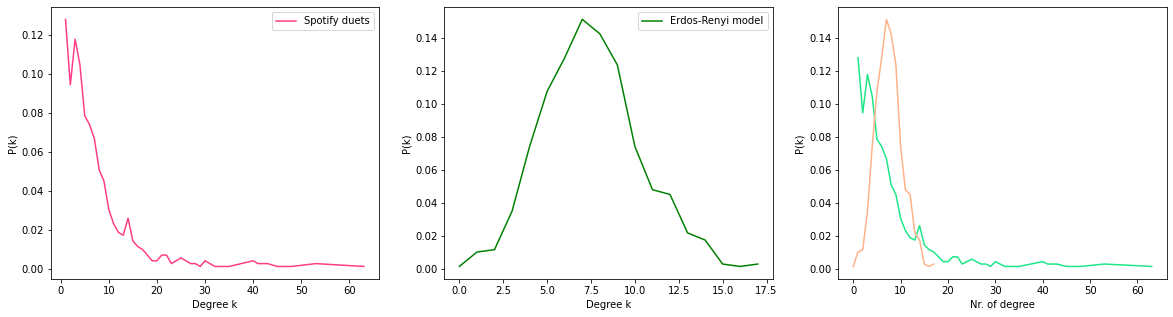

In [489]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
deg_sif, pmf_sif = getDegreeDistribution(G_weighted)
plt.plot(deg_sif, pmf_sif, color='#ff3c87', label='Spotify duets')
plt.legend()
plt.xlabel("Degree k")
plt.ylabel("P(k)")

plt.subplot(1,3,2)
deg_er, pmf_er = getDegreeDistribution(er_model)
plt.plot(deg_er, pmf_er, color='g', label="Erdos-Renyi model")
plt.legend()
plt.xlabel("Degree k")
plt.ylabel("P(k)")

plt.subplot(1,3,3)
plt.plot(deg_sif, pmf_sif, color='#1ce787', label='Spotify duets')
plt.plot(deg_er, pmf_er, color='#ffb187', label="Erdos_Renyi model")
plt.xlabel('Nr. of degree')
plt.ylabel('P(k)')

plt.show()

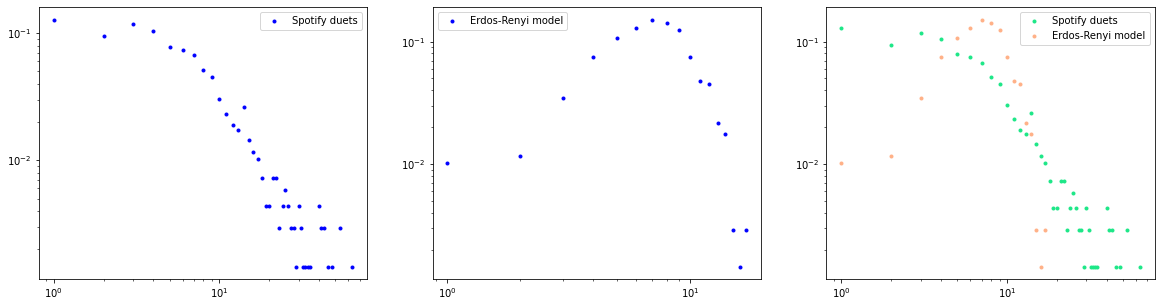

In [490]:
plt.figure(figsize=(20,5))
options = dict(ls='', marker='.')

plt.subplot(1,3,1)
plt.loglog(deg_sif, pmf_sif, label='Spotify duets', color='b', **options)
plt.legend()

plt.subplot(1,3,2)
plt.loglog(deg_er, pmf_er, label='Erdos-Renyi model', color='b', **options)
plt.legend()

plt.subplot(1,3,3)
plt.loglog(deg_sif, pmf_sif, label='Spotify duets', color='#1ce787', **options)
plt.loglog(deg_er, pmf_er, label='Erdos-Renyi model', color='#ffb187', **options)
plt.legend()


plt.show()

## Clustering coefficient distribution

In [475]:
cc=nx.clustering(G_weighted)
sort_cc = OrderedDict(sorted(cc.items(), key=lambda x: x[1]))
print ( 'Number of nodes where CC=1.00 -', sum(value == 1.0 for value in sort_cc.values()))
print ( 'Number of nodes where CC=0.00 -', sum(value == 0.0 for value in sort_cc.values()))

print('')

cc_er = nx.clustering(er_model)
sort_er = OrderedDict(sorted(cc_er.items(), key=lambda x: x[1]))
print ( 'ER-Number of nodes where CC=1.00 -', sum(value == 1.0 for value in sort_er.values()))
print ( 'ER-Number of nodes where CC=0.00 -', sum(value == 0.0 for value in sort_er.values()))

Number of nodes where CC=1.00 - 8
Number of nodes where CC=0.00 - 278

ER-Number of nodes where CC=1.00 - 0
ER-Number of nodes where CC=0.00 - 543


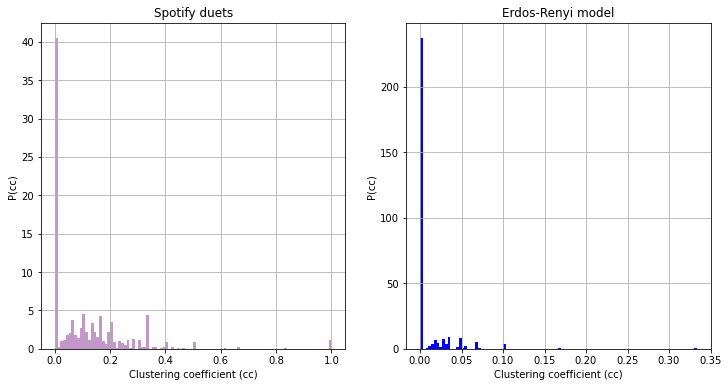

In [476]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(cc.values(), bins=100, density=True, color='#c497ca')
plt.grid(True)
plt.title('Spotify duets')
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")

plt.subplot(1,2,2)
plt.hist(cc_er.values(), bins=100, density=True, color='b')
plt.grid(True)
plt.title("Erdos-Renyi model")
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")
plt.show()

### Betweenness centrality distribution

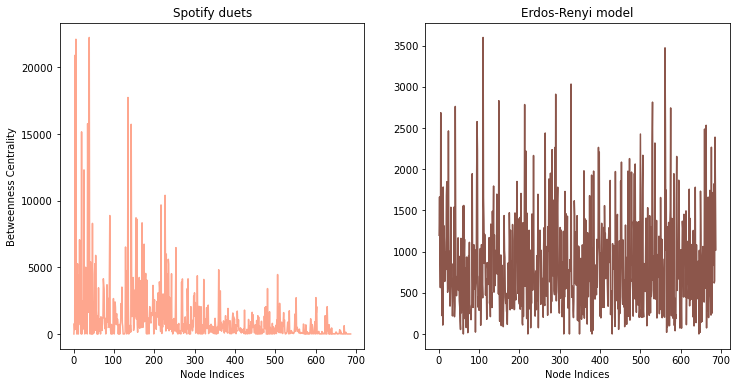

In [477]:
plt.figure(figsize=(12,6))

bc = nx.betweenness_centrality(G_weighted, normalized=False)
bc = np.asarray(list(bc.values()))

bc_er = nx.betweenness_centrality(er_model, normalized=False)
bc_er = np.asarray(list(bc_er.values()))

num_nodes = len(G_weighted.nodes())
nodes_axis = range(1, num_nodes + 1)

plt.subplot(1,2,1)
plt.plot(nodes_axis, bc, color='#fea68e')
plt.xlabel('Node Indices')
plt.ylabel('Betweenness Centrality')
plt.title('Spotify duets')

plt.subplot(1,2,2)
plt.plot(nodes_axis, bc_er, color='C75')
plt.xlabel('Node Indices')
plt.title('Erdos-Renyi model')

plt.show()

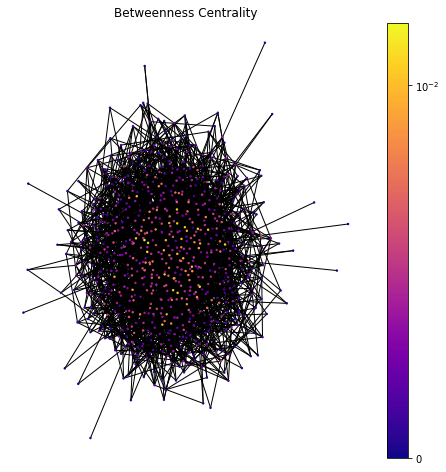

In [479]:
plt.figure(figsize=(8,8))
draw(giant_subgraph, pos, nx.betweenness_centrality(giant_subgraph), 'Betweenness Centrality')

### Degree centrality

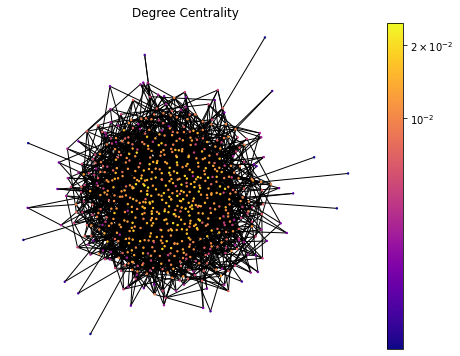

In [480]:
plt.figure(figsize=(8,6))
draw(giant_subgraph, pos, nx.degree_centrality(giant_subgraph), 'Degree Centrality')

### Closeness centrality

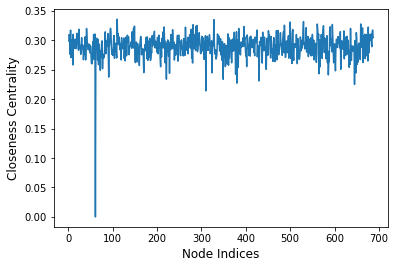

In [481]:
closeness_centrality = nx.closeness_centrality(er_model)
closeness_sorted_by_value = OrderedDict(sorted(closeness_centrality.items(), key=lambda x: x[1]))
cce = nx.closeness_centrality(er_model)
cce = np.asarray(list(cce.values()))

num_nodes = len(er_model.nodes())
nodes_axis = range(1, num_nodes + 1)


plt.plot(nodes_axis, cce)
plt.xlabel('Node Indices', fontsize=12)
plt.ylabel('Closeness Centrality', fontsize=12)
plt.show()

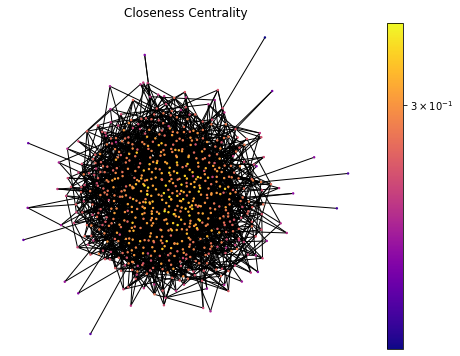

In [482]:
plt.figure(figsize=(8,6))
draw(giant_subgraph, pos, nx.closeness_centrality(giant_subgraph), 'Closeness Centrality')

### Eigenvector centrality

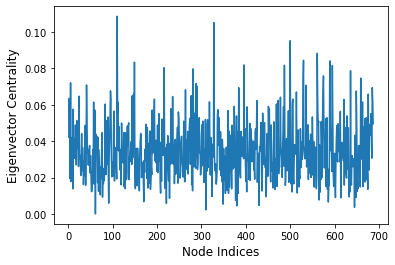

In [483]:
eigenvector_centrality = nx.eigenvector_centrality(er_model)
ec_sorted_by_value = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
ec = nx.eigenvector_centrality(er_model)
ec = np.asarray(list(ec.values()))

num_nodes = len(er_model.nodes())
nodes_axis = range(1, num_nodes + 1)


plt.plot(nodes_axis, ec)
plt.xlabel('Node Indices', fontsize=12)
plt.ylabel('Eigenvector Centrality', fontsize=12)
plt.show()

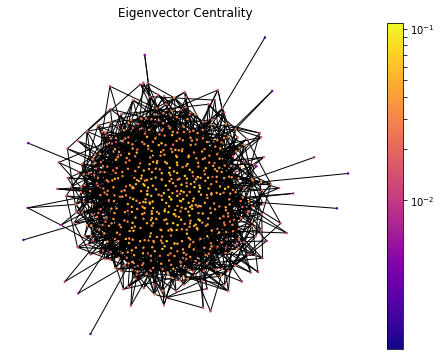

In [484]:
plt.figure(figsize=(8,6))
draw(giant_subgraph, pos, nx.eigenvector_centrality(giant_subgraph), 'Eigenvector Centrality')

## Most Important Nodes

In [437]:
def most_important_three(measures):    
    sorted_results = OrderedDict(sorted(measures.items(), key=lambda x: x[1], reverse=True))
    while len(sorted_results) >3:
        sorted_results.popitem()
    return sorted_results

In [485]:
clustering_coefficient_score = nx.clustering(er_model,nodes=er_model.nodes())
degree_centrality = nx.degree_centrality(er_model)
closeness_centrality = nx.closeness_centrality(er_model)
betweeness_centrality = nx.betweenness_centrality(er_model)
eigenvector_centrality = nx.eigenvector_centrality(er_model)

print('Clustering coefficient:')
print(most_important_three(clustering_coefficient_score))

print("")

print('Degree centrality:')
print(most_important_three(degree_centrality))

print("")

print('Closeness centrality:')
print(most_important_three(closeness_centrality))

print('')

print('Betweeness centrality:')
print(most_important_three(betweeness_centrality))

print('')

print("Eigenvector centrality:")
print(most_important_three(eigenvector_centrality))

Clustering coefficient:
OrderedDict([(601, 0.3333333333333333), (650, 0.16666666666666666), (186, 0.1)])

Degree centrality:
OrderedDict([(109, 0.02478134110787172), (560, 0.02478134110787172), (327, 0.023323615160349854)])

Closeness centrality:
OrderedDict([(109, 0.3354592730387187), (327, 0.3348024756367829), (529, 0.33139605509978076)])

Betweeness centrality:
OrderedDict([(109, 0.015320699605931057), (560, 0.01478449941228448), (327, 0.012914331583659788)])

Eigenvector centrality:
OrderedDict([(109, 0.10859100791034276), (327, 0.10509124864274831), (499, 0.09512832359874943)])


### This part was implemented by Anna